![data-x](http://oi64.tinypic.com/o858n4.jpg)


# Homework 10: LTI

*Code snippets given run on both Python 2.7 and Python 3.5*


## Topics covered:

* Correlation
* Convolution
* Fourier Transforms

# Part 1: Theoretical Questions

*Answer the questions below by either writing (LaTeX'ing) them in the Markdown cell or handing in handwritten solutions at the start of next lecture (if you write by hand, also scan your handwritten solutions and push them to Github)*

## Question 1.1
Derive the mathematical relationship between covariance and correlation. Explain, with words, the difference between these two measurements.

    Input your answer here

### Question 1.2
What is the difference between Pearson, Kendall, and Spearman correlation?

    Input your answer here

### Question 1.3
Why can it be useful to look at the correlation between features when you're creating a machine learning model?

    Input your answer here

### Question 1.4
Intuitively, with words, explain the concept of convolution in the one dimensional case. Moreover, explain what cross-correlation, convolution, and auto-correlation have in common.

    Input your answer here

### Question 1.5
What is the difference between the *sample mean* and the *population mean*?

    Input your answer here

### Question 1.6

Prove that the forward Fourier transform of the $\mathrm{rect}$ function is: $\mathfrak{F}_t(\Pi(t)) = \int_{-\infty}^\infty \Pi(t)\cdot e^{-i 2\pi f t} \, dt
=\frac{\sin(\pi f)}{\pi f} = \mathrm{sinc}{(\pi f)}$, by calculating the integral.

    Input your answer here

# Part 2

## 2.0: Pre-Setup

In [2]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division, absolute_import #make notebook compatible with Python 2 and Python 3

# Data description

- Data source: https://www.ncdc.noaa.gov/
- Data description: https://www7.ncdc.noaa.gov/CDO/GSOD_DESC.txt
- Data file: data.txt

# Question 2.1: Preprocess the data

- **2.1.1:** Read in the data in `data.txt` to a pandas DataFrame, and remove all white space characters in the column strings.


- **2.1.2:** Drop the columns with column indices `[0,1,4,6,7,8,9,10,12,14,16,20,21,22]`. I.e. you should only keep the `['YEARMODA', 'TEMP', 'DEWP', 'VISIB', 'WDSP', 'MXSPD', 'MAX', 'MIN','PRCP']` columns.


- **2.1.3:** Convert column `YEARMODA` to a Panda's Datetime object with `format='%Y%m%d'`. Assign the DataFrame index to be the Datetime converted `YEARMODA` column and delete the index name (with `del df.index.name`). Drop the column `YEARMODA` from the DataFrame.


- **2.1.4:** Columns `['MAX', 'MIN', 'PRCP']` contain non-numeric entries. Convert all these values in the three columns to dtype `float64`.


- **2.1.5:** There are some samples missing in the columns `['MAX','MIN','MXSPD','PRCP']`, these are recorded as unreasonably high values. See the Data description link above for further details. Assign `np.nan` (NaN) to these entries and then use pandas method `.interpolate()` on the DataFrame to replace the NaN entries with linearly interpolated, reasonable values.

In [3]:
import pandas as pd
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
df = pd.read_csv("data.txt", header=0,sep=',')

In [4]:
'''Input answer to Question 2.1'''
df = df.drop(df.columns[[0,1,4,6,7,8,9,10,12,14,16,20,21,22]], axis=1)
df.columns = [col.strip() for col in df.columns]
print(df.keys())
df['YEARMODA'] = pd.to_datetime(df['YEARMODA'],format='%Y%m%d')
df.index = df['YEARMODA']
del df.index.name
df = df.drop('YEARMODA',1)
df['MAX'] = df['MAX'].map(lambda x: x.strip('*'))
df['MIN'] = df['MIN'].map(lambda x: x.strip('*'))
df['PRCP'] = df['PRCP'].map(lambda x: str(x)[:-1])
#df = df.apply(pd.to_numeric, errors='coerce')
df['MAX'] = df['MAX'].apply(float)
df['MIN'] = df['MIN'].apply(float)
df['PRCP'] = df['PRCP'].apply(float)
for idx in range(len(df['MAX'])):
    if df['MAX'][idx]==9999.9:
        df['MAX'][idx] = np.nan
for idx in range(len(df['MIN'])):
    if df['MIN'][idx]==9999.9:
        df['MIN'][idx] = np.nan
for idx in range(len(df['MXSPD'])):
    if df['MXSPD'][idx]==999.9:
        df['MXSPD'][idx] = np.nan
for idx in range(len(df['PRCP'])):
    if df['PRCP'][idx]==99.99:
        df['PRCP'][idx] = np.nan
df = df.interpolate()
df

Index(['YEARMODA', 'TEMP', 'DEWP', 'VISIB', 'WDSP', 'MXSPD', 'MAX', 'MIN',
       'PRCP'],
      dtype='object')


,TEMP,DEWP,VISIB,WDSP,MXSPD,MAX,MIN,PRCP
1974-01-01,44.1,34.8,23.0,9.0,17.1,51.8,37.4,0.20
1974-01-02,41.8,18.4,29.4,12.7,19.0,51.8,33.8,0.12
1974-01-03,40.9,32.2,14.3,9.8,18.1,44.6,33.8,0.08
1974-01-04,40.0,36.6,12.4,8.5,18.1,44.6,36.9,1.34
1974-01-05,40.8,36.7,11.4,6.5,12.0,46.9,37.0,0.20
1974-01-06,42.8,37.5,14.7,6.4,14.0,48.2,35.6,0.31
1974-01-07,41.3,37.2,13.7,9.1,15.9,46.9,35.6,0.16
1974-01-08,42.1,33.3,26.9,4.6,10.1,53.1,33.8,0.08
1974-01-09,41.6,34.6,14.1,2.8,6.0,53.6,33.8,0.00
1974-01-10,42.3,37.7,6.3,4.7,8.9,46.9,33.8,0.00


# Question 2.2: Correlation

- **2.2.1:** Find all the lowest (close to 0) and highest (close to 1 or -1, **hint:** look at the absolute value) correlation pairs in the DataFrame, excluding correlation with the same variable. Note that low correlation means abscence of correlation, i.e. the value is close to zero (and not negative numbers). High positive correlation is close to 1 and high negative correlation is close to -1. Answer with 8 correlation pairs for low correlation and 8 correlation pairs for high correlation.


- **2.2.2:** Look at features TEMP and WDSP (temperature and wind speed), find their yearly correlation and extract the year with the highest correlation, and the year with the lowest correlation between the two features. Hint: `df.index.year` will give you the years, and you can select yearly data by using `df[['TEMP','WDSP']]['1999']` (as an example for 1999). 


- **2.2.3:** Plot two plots, the first plot is the TEMP and WDSP signals (as line plots in the same plot) for the year with highest correlation, also subtract the individual mean for both features -- so that they are zero mean. Do the same in the second plot, but for the year with the lowest correlation between the features. Is it possible, by looking at the plots, to distinguish the highly correlated year from the year with the lowest correlation?

In [21]:
'''Input answers to Question 2.2'''
df.corr()
# TEMP: lowest=VISIB, highest=MAX
# DEWP: lowest=PRCP, highest=MIN
# VISIB: lowest=MIN, highest=WDSP
# WDSP: lowest=PRCP, highest=MXSPD
# MAX: lowest=VISIB, highest=TEMP
# MIN: lowest=VISIB, highest=TEMP
# PRCP: lowest=DEWP, highest=MAX

,TEMP,DEWP,VISIB,WDSP,MXSPD,MAX,MIN,PRCP
TEMP,1.000000,0.735231,0.111447,0.230555,0.277120,0.891540,0.869977,-0.148344
DEWP,0.735231,1.000000,-0.163481,0.175358,0.185727,0.556767,0.820610,0.005253
VISIB,0.111447,-0.163481,1.000000,0.248780,0.181483,0.131766,-0.001618,-0.081189
WDSP,0.230555,0.175358,0.248780,1.000000,0.838847,0.145611,0.342993,0.074483
MXSPD,0.277120,0.185727,0.181483,0.838847,1.000000,0.230098,0.330632,0.092296
MAX,0.891540,0.556767,0.131766,0.145611,0.230098,1.000000,0.672177,-0.221919
MIN,0.869977,0.820610,-0.001618,0.342993,0.330632,0.672177,1.000000,-0.070922
PRCP,-0.148344,0.005253,-0.081189,0.074483,0.092296,-0.221919,-0.070922,1.000000


max year: 1994 with correlation: 0.414242010027
min year: 2008 with correlation: 0.0436287605464


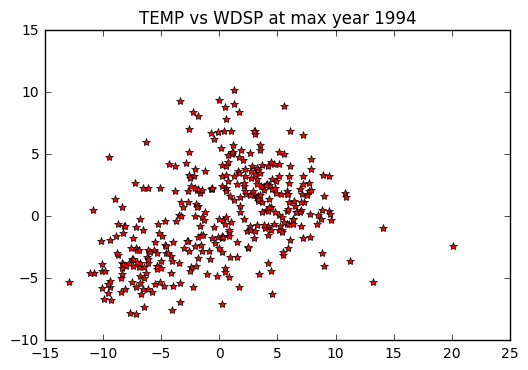

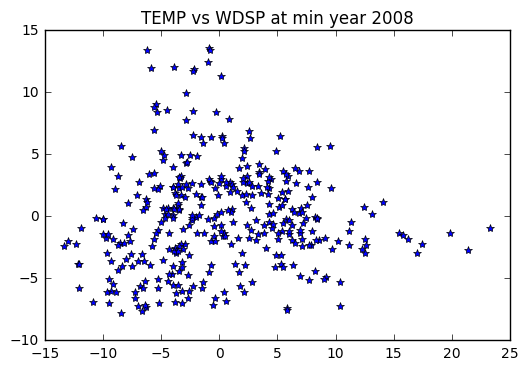

In [26]:
max_year, min_year = df.index[0],df.index[0]
max_corr, min_corr = 0, float("inf")
for year in df.index.year:
    curr_corr = df[['TEMP','WDSP']][str(year)].corr()['TEMP']['WDSP']
    if abs(curr_corr) > abs(max_corr):
        max_corr = curr_corr
        max_year = year
    elif abs(curr_corr) < abs(min_corr):
        min_corr = curr_corr
        min_year = year

print("max year:",max_year,"with correlation:",max_corr)
print("min year:",min_year,"with correlation:",min_corr)

# max correlation plot and min correlation plot are distinguishable by just looking at those
plt.title("TEMP vs WDSP at max year "+str(max_year))
plt.plot(df['TEMP'][str(max_year)]-np.mean(df['TEMP'][str(max_year)]),df['WDSP'][str(max_year)]-np.mean(df['WDSP'][str(max_year)]),'*r')
plt.show()
plt.title("TEMP vs WDSP at min year "+str(min_year))
plt.plot(df['TEMP'][str(min_year)]-np.mean(df['TEMP'][str(min_year)]),df['WDSP'][str(min_year)]-np.mean(df['WDSP'][str(min_year)]),'*b')
plt.show()

# Question 2.3: FFT & Convolution

If you are unsure about the answers to the questions below, please look through the lecutre notes on FFT and LTI, found here: https://github.com/ikhlaqsidhu/data-x/tree/master/04b-theory-data-signal-lti

- **2.3.1:** Create a variable called signal with the temperature data, i.e.: `signal = df['TEMP']`. Subtract the mean from the signal (so that it becomes zero mean).


- **2.3.2:** Take monthly mean samples from the signal (hint: use pandas method `.resample('M',how='mean')`. If you run `signal.shape`, on the resampled signal, it should be `(516,)`.


- **2.3.3:** Plot the absolute value of the FFT of the resampled signal, i.e. `fft_x = np.abs(np.fft.fft(signal))`. Where do you expect to find peaks on the frequency spectrum, and why? How is this related to (eventual) seasonality in the temperature data?


- **2.3.4:** Instead of plotting the direct Fourier transform of the resampled signal, only plot the first half and normalize it, to get the correct amplitude. I.e. `2/len(signal) * fft_x[:int(np.ceil(len(signal)/2))]`). Plot this normalized, first half of the FFT.


- **2.3.5:** Convolve the resampled signal (from **2.3.2**), with a rect function that is half the length of a period in the temp data (i.e. 6 months, since we resampled monthly). Hint: use `np.convolve(signal,rect)` where `rect = np.ones(6)/6`. Plot the the resulting, convolved signal and explain what happened.


- **2.3.6:** Take the FFT of the convolved signal and normalize it (i.e. multiply by `2.0/n`). Only plot the first half of the FFT (just like in **2.3.4**). What has changed in the frequency spectrum after the signal was convolved? Also, try to explain why this happened.

In [28]:
# Install package mpld3 if you want to be able to zoom in plots: https://anaconda.org/conda-forge/mpld3
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import warnings
warnings.filterwarnings('ignore')

(516,)


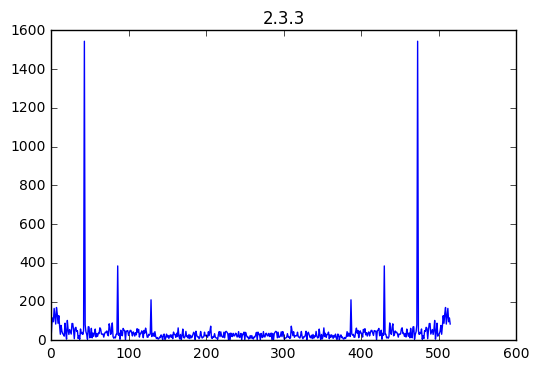

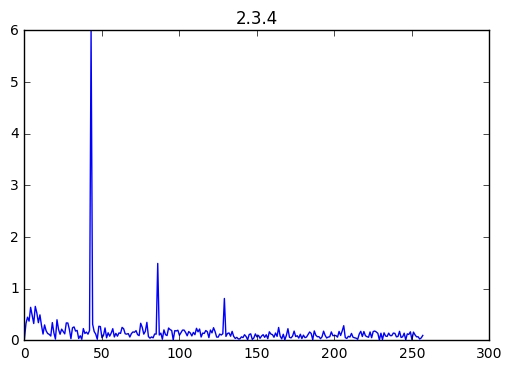

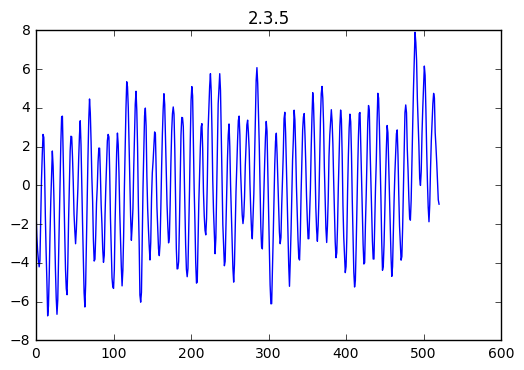

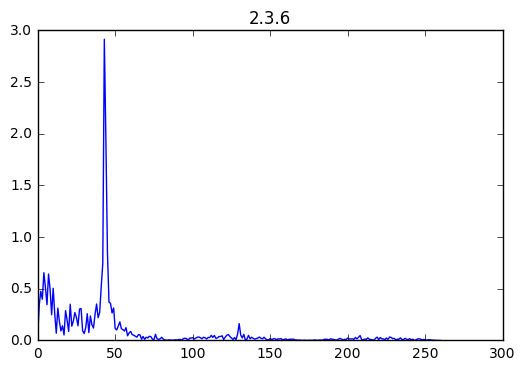

In [45]:
'''Input answers to Question 2.3'''
signal = df['TEMP']-np.mean(df['TEMP'])
signal = signal.resample('M',how='mean')
print(signal.shape)
# It is expected to peak at some month around summer
# because it has the highest temperature change
fft_x = np.abs(np.fft.fft(signal))
plt.title("2.3.3")
plt.plot(fft_x)
plt.show()
plt.title("2.3.4")
plt.plot(2/len(signal) * fft_x[:int(np.ceil(len(signal)/2))])
plt.show()
rect = np.ones(6)/6
plt.title("2.3.5")
conv_signal = np.convolve(signal,rect)
conv_fft_x = np.abs(np.fft.fft(conv_signal))
plt.plot(conv_signal)
plt.show()
#Now the signal looks more evenly osciallating function
plt.title("2.3.6")
plt.plot(2/len(conv_signal) * conv_fft_x[:int(np.ceil(len(conv_signal)/2))])
plt.show()
# The system is now expressed relatively simply as an operation on frequencies
# because convolution in the time domain corresponds to ordinary multiplication in the frequency domain.